In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import gumbel_r, norm, uniform

x=np.arange(0,1000,5)
A=45

y=gumbel_r.pdf(x,loc=300,scale=75)
# y=norm.pdf(x,loc=225,scale=75)

y=y/np.cumsum(y)[-1]*1

P=(A*x)*(1-(np.cumsum(y))) + np.cumsum(A*x*y)

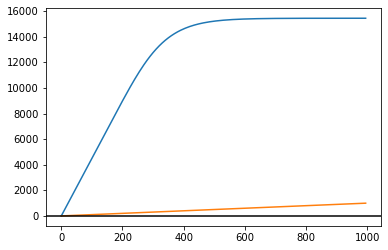

In [3]:
plt.plot(x,P)
plt.plot(x,x)
plt.axhline(0,c='black')
plt.show()

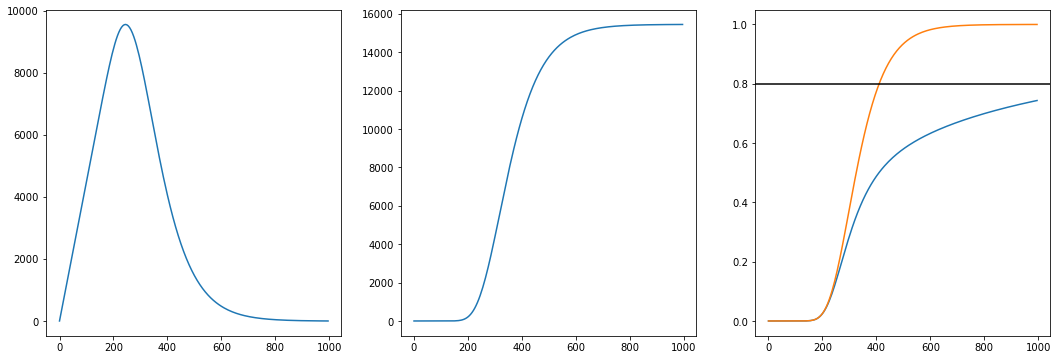

In [4]:
fig,ax = plt.subplots(1,3,figsize=(18,6))
ax[0].plot(x,(A*x)*(1-(np.cumsum(y))))
ax[1].plot(x,np.cumsum(A*x*y))
ax[2].plot(x,((A*x*(np.cumsum(y)))/(.01+(A*x)+np.cumsum(A*x*y))))
ax[2].plot(x,((A*x*(np.cumsum(y)))/(.01+(A*x))))
ax[2].axhline(.8,c='black')

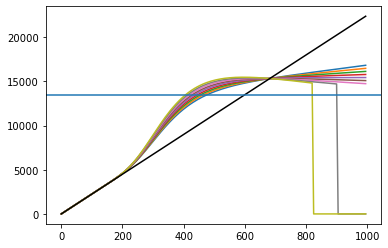

In [5]:
for a in np.arange(.8,1.25,.05):
    plt.plot(x,(np.cumsum(A*x*(y*a))+.5*(A*x)*(1-(np.cumsum(y*a))))*(((A*x*(np.cumsum(y*a)))/(.01+(A*x)+np.cumsum(A*x*(y*a))))<.8))
    
plt.plot(x,.5*A*x,c='black')
plt.axhline(300*A)
plt.show()

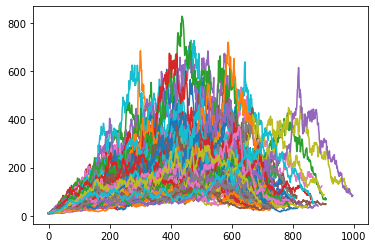

(array([ 9., 23., 28., 10., 10.,  7.,  4.,  5.,  3.,  1.]),
 array([150.57599529, 218.29088485, 286.00577441, 353.72066397,
        421.43555353, 489.15044309, 556.86533265, 624.5802222 ,
        692.29511176, 760.01000132, 827.72489088]),
 <BarContainer object of 10 artists>)

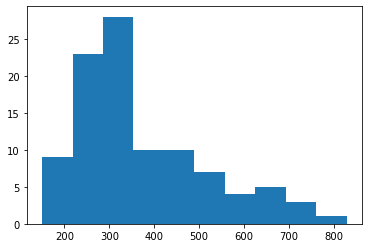

In [38]:
import numpy as np
from scipy.stats import gumbel_r, norm, uniform


def simulate_bull_run():
    t0 = 0
    t1 = int(np.random.normal(540,90))
    t2 = int(np.random.normal(t1+180,45))

    T=np.arange(t0,t2)

    f0 = 10
    f1 = gumbel_r.rvs(loc=225,scale=75)
    f2 = np.random.normal(f1/4, f1/20)

    F = np.concatenate([np.arange(f0,f1,(f1/t1)),np.arange(f1,f2,((f2-f1)/(t2-t1)))])

    ft=np.zeros(len(T))
    ft[0]=f0
    for t in T[1:]:
        if t<t1:
            ft[t] = ft[t-1]+np.random.normal((f1-ft[t-1])/(t1-t),ft[t-1]/20)
        else:
            ft[t] = ft[t-1]+np.random.normal((f2-ft[t-1])/(t2-t),ft[t-1]/20)

    return ft


runs=[]

for i in range(100):
    f = simulate_bull_run()
    runs = np.concatenate([runs,[max(f)]])
    plt.plot(f)
    
plt.show()

plt.hist(runs)
# plt.plot(ft)
# plt.title("times: "+str((t0,t1,t2))+" prices:"+str((f0,f1,f2)))

# plt.axvline(t1,c='black')

(array([634., 301.,  45.,  11.,   1.,   4.,   0.,   2.,   1.,   1.]),
 array([1.08904787, 1.47605515, 1.86306244, 2.25006973, 2.63707702,
        3.02408431, 3.4110916 , 3.79809889, 4.18510618, 4.57211347,
        4.95912076]),
 <BarContainer object of 10 artists>)

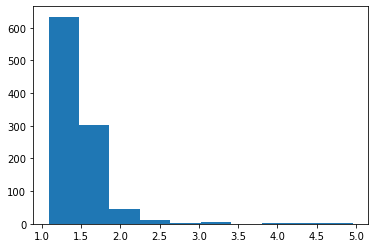

In [8]:
plt.hist(np.exp(runs/1000))

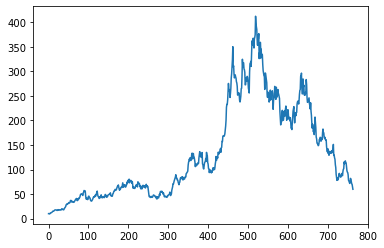

In [9]:
plt.plot(simulate_bull_run())
plt.show()

array([1.41397387e-24, 2.87546504e-24, 5.79182143e-24, ...,
       3.21891247e-18, 3.17627850e-18, 3.13420920e-18])

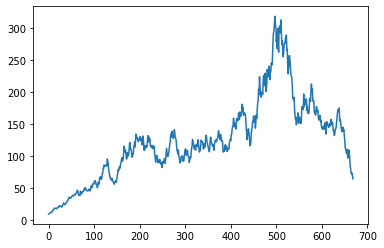

In [10]:
f = simulate_bull_run()

plt.plot(f)


x = np.arange(0,3000)
target= gumbel_r.pdf(x,loc=300,scale=75)
target

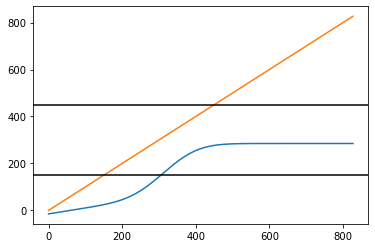

In [56]:
avg_buy=15

A = []

# for loc in np.arange(225,1050,75):
#     print(loc)

x = np.arange(0,max(runs))
# target= gumbel_r.pdf(x,loc=300,scale=75)
target= norm.pdf(x,loc=300,scale=75)
plt.plot((np.cumsum(target*x) + (1-np.cumsum(target))*.25*x)-avg_buy)
plt.plot(x)

A.append(np.mean((np.cumsum(target*x) + (1-np.cumsum(target))*.25*x - avg_buy)[runs.astype(int)]))
    
plt.axhline(150,c='black')
plt.axhline(450,c='black')

In [64]:
plt.plot((np.cumsum(target[75,150,225,300,375,450])*np.array([75,150,225,300,375,450])))

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

In [101]:
.2*75+sum(np.arange(150,451,75)*np.diff(np.cumsum(target)[np.arange(75,451,75)]/np.cumsum(target)[450])*.8)

280.99790322299293

In [98]:
np.arange(75,451,75)

array([ 75, 150, 225, 300, 375, 450])

In [100]:
np.diff(np.cumsum(target)[np.arange(75,451,75)]/np.cumsum(target)[450])

array([0.0222305 , 0.14030634, 0.35024094, 0.34809998, 0.13774245])

In [104]:
.2*75 + .8*75/4

30.0

In [105]:
Z=np.diff(np.cumsum(target)[np.arange(75,451,75)]/np.cumsum(target)[450])
.2*75 + Z[0]*150 + sum(Z[1:])*150/4

54.949188575525795

In [113]:
Y=np.arange(75,451,75)

[sum(Z[:(i)]*Y[:i])+(sum(Z[i+1:])*Y[i])/4 for i in range(1,len(Z))]

[33.0204138141045, 50.04187434692379, 111.84813349018793, 205.9474448495876]

In [124]:
sum(Z[1:])*Y[1]

146.45845679591093

In [129]:
#75
print(.2*75 + .8*75/4)


#150
print(.2*75 + Z[0]*Y[1] + sum(Z[1:])*Y[1]/4)


#225
print(.2*75 + Z[0]*Y[1] + Z[1]*Y[2] + sum(Z[2:])*Y[2]/4)


#300
print(.2*75 + Z[0]*Y[1] + Z[1]*Y[2] + Z[2]*Y[3] + sum(Z[3:])*Y[4]/4)


#375
print(.2*75 + Z[0]*Y[1] + Z[1]*Y[2] + Z[2]*Y[3] + Z[3]*Y[4] + sum(Z[4:])*Y[5]/4)


#450
print(.2*75 + Z[0]*Y[1] + Z[1]*Y[2] + Z[2]*Y[3] + Z[3]*Y[4] + Z[4]*Y[5])





30.0
54.949188575525795
96.93318975417736
200.52351097985286
301.00930229510953
347.49737902874114


In [82]:

[np.mean([np.mean(runs>price) for price in np.arange(75,451,dp)]* np.arange(75,451,dp)) for dp in np.arange(1,76,1)]

[152.76925531914895,
 152.63542553191488,
 152.55761904761903,
 152.62829787234043,
 152.18223684210525,
 152.37809523809528,
 152.43555555555557,
 152.37638297872343,
 152.70071428571433,
 151.74078947368423,
 150.8914285714286,
 151.4296875,
 152.04896551724138,
 152.47111111111113,
 150.34615384615384,
 150.6975,
 150.14652173913046,
 152.36714285714285,
 151.387,
 151.55789473684212,
 150.995,
 149.48666666666662,
 149.82000000000002,
 151.336875,
 149.203125,
 149.49333333333334,
 151.66714285714286,
 149.96785714285716,
 152.22307692307692,
 148.93846153846155,
 148.9353846153846,
 150.03416666666666,
 147.9525,
 147.42583333333334,
 150.72727272727275,
 149.69454545454548,
 147.61818181818182,
 150.17199999999997,
 148.74900000000002,
 147.685,
 147.08800000000002,
 151.42999999999998,
 151.22555555555553,
 147.96777777777777,
 146.20000000000002,
 144.79111111111112,
 149.75875000000002,
 150.07125000000002,
 149.52875,
 148.03125,
 145.38,
 145.4575,
 145.7475,
 151.32,
 149.8

In [ ]:
for loc in np.arange(225,75,1050):
    print(loc)

In [ ]:
plt.hist((np.cumsum(target))[runs.astype(int)])

In [ ]:
import matplotlib.pyplot as plt

plt.plot([t0,t1,t2],[f0,f1,f2])